**ANÁLISE EXPLORATÓRIA DE DADOS: SPOTIFY SONGS**

Este projeto analisa um conjunto de dados referentes a mais de 30000 faixas do Spotify, desde 1957 até o ano de 2020.

O intuito é identificar como as características musicais influenciam a popularidade das músicas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "vscode"

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-01-21/spotify_songs.csv")

Nessa etapa as colunas foram traduzidas para o português, com o intuito de facilitar a análise dos dados

Além disso, os valores das colunas **tom** e **modo** foram mapeados para seus nomes reais. E foi criada uma coluna com os valores da duração convertidos para minutos.

E também campos que antes estavam nulos, agora eles são apresentados como "Não informados".

In [3]:
update_columns = {
    "track_id": "id_faixa",
    "track_name": "nome_faixa",
    "track_artist": "artista",
    "track_popularity": "popularidade",
    "track_album_id": "id_album",
    "track_album_name": "nome_album",
    "track_album_release_date": "lancamento",
    "playlist_name": "playlist",
    "playlist_id": "id_playlist",
    "playlist_genre": "genero",
    "playlist_subgenre": "subgenero",
    "danceability": "dancabilidade",
    "energy": "intensidade",
    "key": "tom",
    "loudness": "volume",
    "mode": "modo",
    "speechiness": "indice_vocal",
    "acousticness": "acustica",
    "instrumentalness": "instrumentalidade",
    "liveness": "indice_performance",
    "valence": "valencia",
    "tempo": "ritmo",
    "duration_ms": "duracao_ms"
}

df = df.rename(columns=update_columns)
print(df.columns)

Index(['id_faixa', 'nome_faixa', 'artista', 'popularidade', 'id_album',
       'nome_album', 'lancamento', 'playlist', 'id_playlist', 'genero',
       'subgenero', 'dancabilidade', 'intensidade', 'tom', 'volume', 'modo',
       'indice_vocal', 'acustica', 'instrumentalidade', 'indice_performance',
       'valencia', 'ritmo', 'duracao_ms'],
      dtype='str')


In [4]:
df.head()

,id_faixa,nome_faixa,artista,popularidade,id_album,nome_album,lancamento,playlist,id_playlist,genero,...,tom,volume,modo,indice_vocal,acustica,instrumentalidade,indice_performance,valencia,ritmo,duracao_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [5]:
update_tom_values = {
    0: "Dó",
    1: "Dó sustenido",
    2: "Ré",
    3: "Ré sustenido",
    4: "Mi",
    5: "Fá",
    6: "Fá sustenido",
    7: "Sol",
    8: "Sol sustenido",
    9: "Lá",
    10: "Lá sustenido",
    11: "Si"
}

df["tom"] = df["tom"].replace(update_tom_values)
df["tom"].value_counts()

tom
Dó sustenido     4010
Dó               3454
Sol              3352
Lá               3027
Si               2996
Ré               2827
Fá               2680
Fá sustenido     2670
Sol sustenido    2430
Lá sustenido     2273
Mi               2201
Ré sustenido      913
Name: count, dtype: int64

In [6]:
update_modo_values = {
    0: "Menor",
    1: "Maior"
}

df["modo"] = df["modo"].replace(update_modo_values)
df["modo"].value_counts()

modo
Maior    18574
Menor    14259
Name: count, dtype: int64

In [7]:
df["lancamento"] = pd.to_datetime(df["lancamento"], format="mixed")
df["lancamento"] = df["lancamento"].dt.year

In [8]:
df["duracao_min"] = df["duracao_ms"] / 60000

In [9]:
df["nome_faixa"] = df["nome_faixa"].fillna("Não informado")
df["artista"] = df["artista"].fillna("Não informado")
df["nome_album"] = df["nome_album"].fillna("Não informado")

In [10]:
df.isnull().sum()

id_faixa              0
nome_faixa            0
artista               0
popularidade          0
id_album              0
nome_album            0
lancamento            0
playlist              0
id_playlist           0
genero                0
subgenero             0
dancabilidade         0
intensidade           0
tom                   0
volume                0
modo                  0
indice_vocal          0
acustica              0
instrumentalidade     0
indice_performance    0
valencia              0
ritmo                 0
duracao_ms            0
duracao_min           0
dtype: int64

Etapa de análise dos gráficos

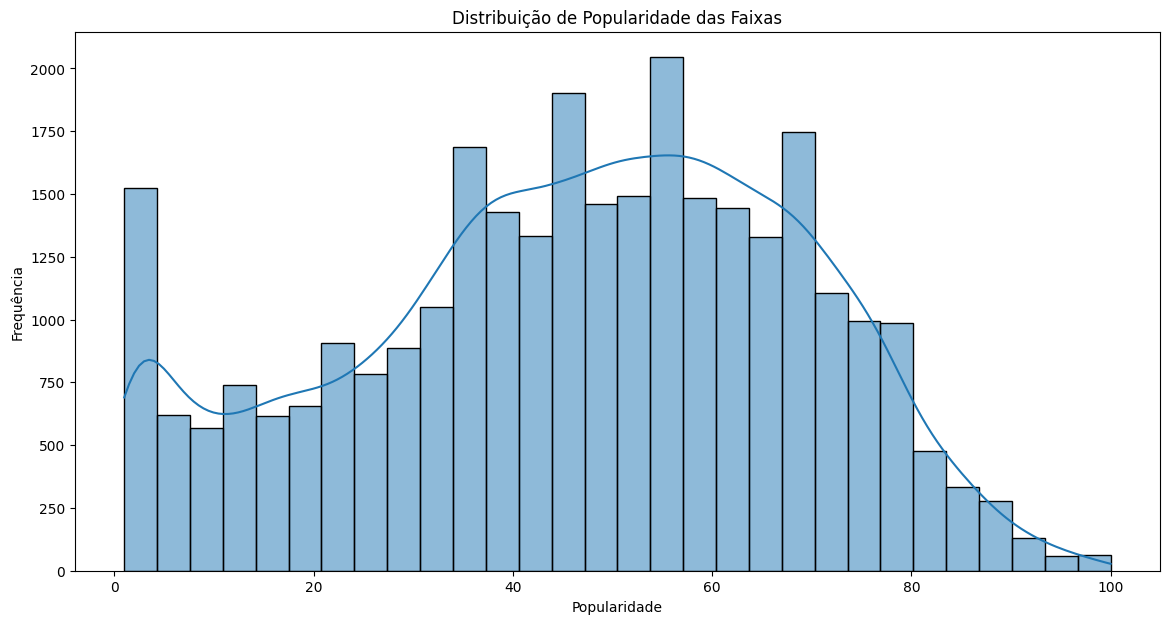

In [11]:
# ANÁLISE DAS FAIXAS COM POPULARIDADE MAIOR QUE ZERO
popularidade_maior_que_zero = df[df["popularidade"] > 0]
popularidade_alta = popularidade_maior_que_zero["popularidade"]

plt.figure(figsize=(14,7))
sns.histplot(
    data=popularidade_alta,
    bins=30,
    kde=True
)
plt.title("Distribuição de Popularidade das Faixas")
plt.xlabel("Popularidade")
plt.ylabel("Frequência")
plt.show()

📊 Distribuição de Popularidade das Faixas

Foram filtradas apenas as músicas com popularidade maior que zero. Isso porque foi verificado anteriormente um volume massivo de faixas com esse valor de popularidade. O que indica que grande parte do catálogo do Spotify pode ser composta por lançamentos muito recentes (conforme os anos registrados no DataFrame) ou até mesmo por faixas antigas que acabaram ficando esquecidas com o tempo, e por esse motivo não entraram no ciclo de recomendação do algoritmo.

Observa-se que a maior parte das músicas analisadas apresentam nível de popularidade por volta do valor 60 (moda). Portanto atingir esse nível é considerado como "padrão de sucesso" para a maioria das músicas que conseguem sair da inércia.

Ademais, também nota-se que após o valor 80 a curva cai significativamente. Tal fator nos permite concluir que essa região que abriga os hits globais é simultaneamente restrita e competitiva.

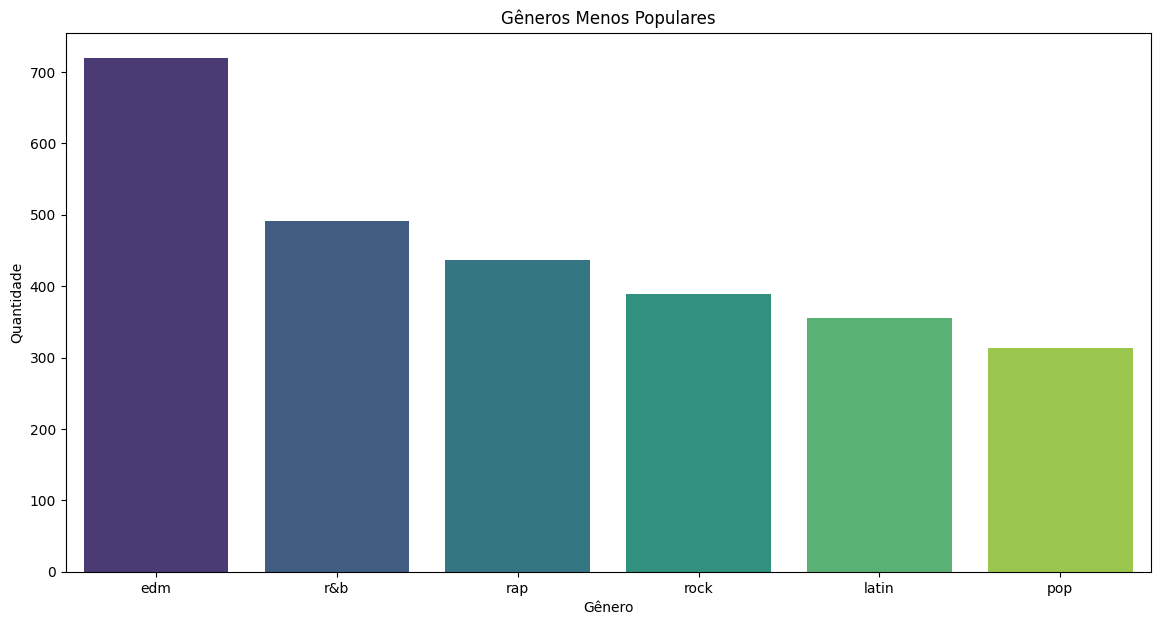

In [12]:
# IDENTIFICAÇÃO DO GÊNERO QUE APRESENTA MAIS FAIXAS SEM POPULARIDADE
menor_popularidade = df[df["popularidade"] == 0]
genero_menos_popular = menor_popularidade["genero"].value_counts().reset_index()

plt.figure(figsize=(14,7))
sns.barplot(
    data=genero_menos_popular,
    x="genero",
    y="count",
    hue="genero",
    palette="viridis"
)
plt.title("Gêneros Menos Populares")
plt.xlabel("Gênero")
plt.ylabel("Quantidade")
plt.show()

📊 Gêneros Menos Populares

A análise do gráfico indica que o gênero menos popular é o EDM (Eletronic Dance Music). Em sequência r&b ocupa a segunda posição de gênero que mais apresenta faixas menos populares.

Portanto, nota-se que muitos lançamentos não alcançam tração inicial.

In [13]:
# RELAÇÃO ENTRE POPULARIDADE E TEMPO
qtd_faixas = df.sample(2000)

fig = px.scatter(
    qtd_faixas,
    x="popularidade",
    y="lancamento",
    color="lancamento",
    title="Relação entre Popularidade e Tempo",
    hover_name="nome_faixa",
    hover_data=["artista"],
    labels={"popularidade": "Popularidade", "lancamento": "Ano"}
)
fig.show()

📊 Relação entre Popularidade e Tempo

A análise do gráfico retrata que o nível mais alto de popularidade, entre os valores 80-100 são ocupados por faixas mais recentes.

Enquanto que músicas dos anos 80 ocupam em média popularidade entre os valores 40 e 60.

Por fim, faixas da década de 1960 são as que apresentam menor popularidade.

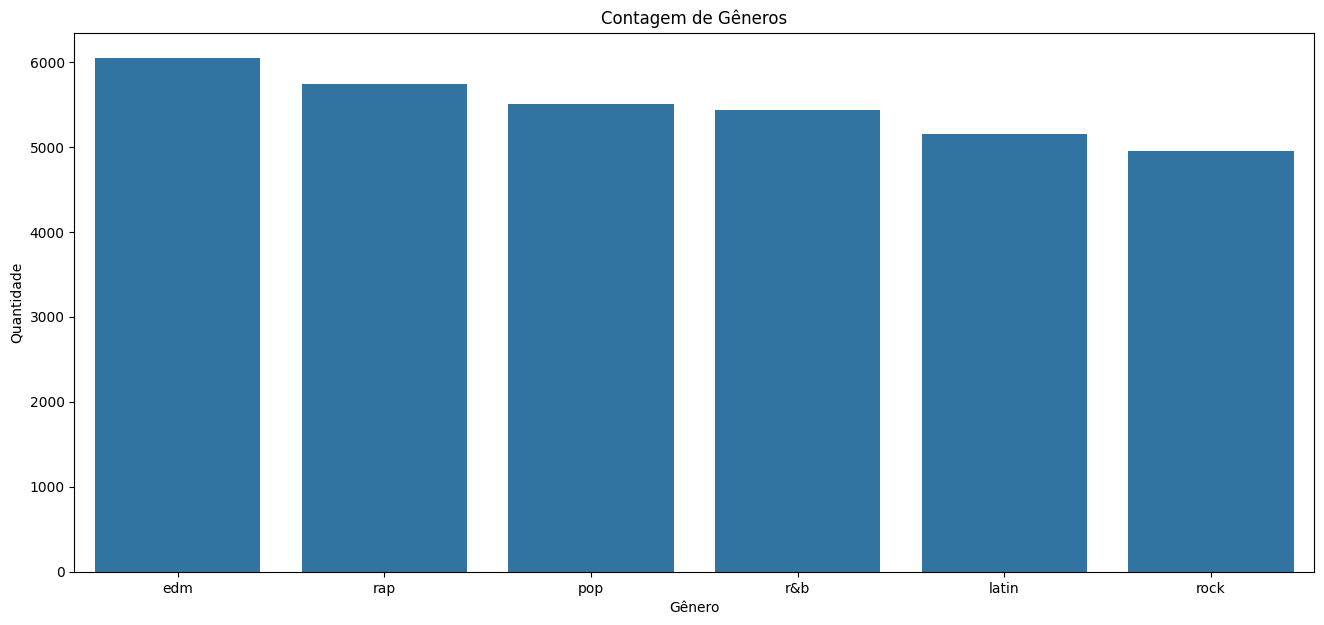

In [14]:
# CONTAGEM DE GÊNEROS
ordem = df["genero"].value_counts().index

plt.figure(figsize=(16,7))
sns.countplot(
    data=df,
    x="genero",
    order=ordem
)
plt.title("Contagem de Gêneros")
plt.xlabel("Gênero")
plt.ylabel("Quantidade")
plt.show()

📊 Contagem de Gêneros

O gráfico apresenta a distribuição dos gêneros musicais presentes no conjunto de dados.

Nota-se que o gênero mais frequente no DataFrame é o EDM (Eletronic Dance Music). Ao passo que o gênero com menor recorrência entre as faixas é o rock.

Contudo, apesar das diferenças de volume de dados, os seis gêneros tem uma base de dados robusta para análises commparativas.

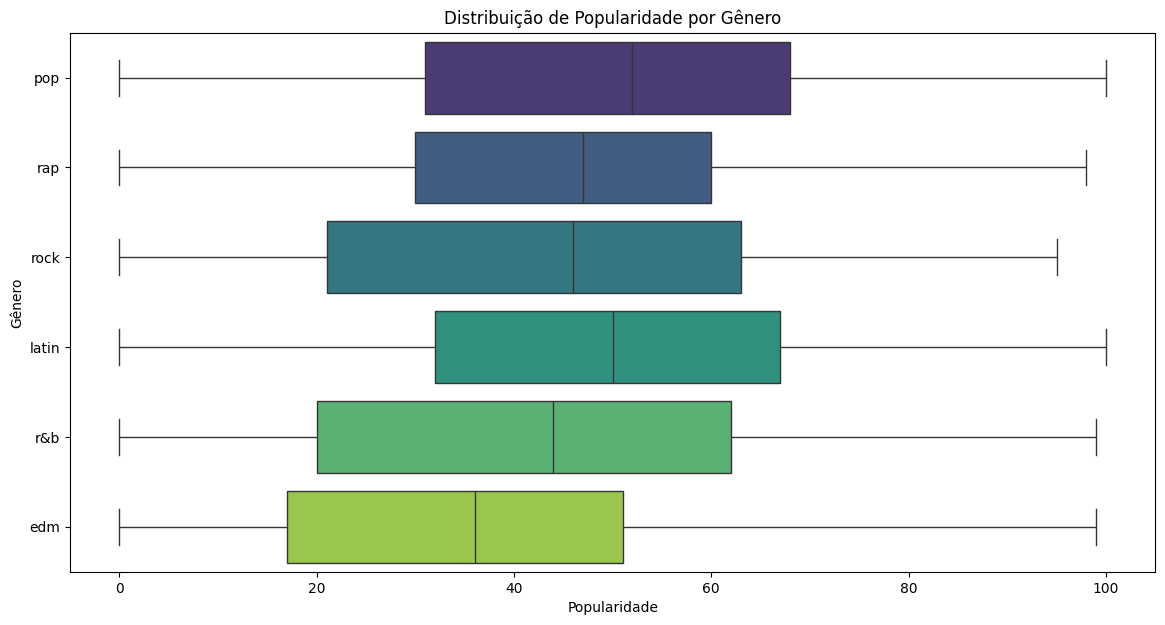

In [15]:
# ANÁLISE DA VARIAÇÃO DE POPULARIDADE PARA CADA GÊNERO
plt.figure(figsize=(14,7))
sns.boxplot(
    data=df,
    x="popularidade",
    y="genero",
    hue="genero",
    palette="viridis"
)
plt.title("Distribuição de Popularidade por Gênero")
plt.xlabel("Popularidade")
plt.ylabel("Gênero")
plt.show()

📊 Distribuição de Popularidade por Gênero

A análise do gráfico nos permite verificar que o gênero com a maior mediana de popularidade é o Pop, ao passo em que o EDM apresenta o menor valor de engajamento.

Esse aspecto prova que uma música Pop tem, de modo geral, maior probabilidade de ser bem aceita pelo público quando comparada aos outros gêneros.

Os gêneros Latim e Rap têm valores de medianas próximas e performance mais estável, considerando que suas caixas são mais compactas. O Rock apresenta grande amplitude, por isso o sucesso neste gênero pode variar significativamente entre as faixas.

Não foram apresentados outliers visíveis, os whiskers alcançam os extremos, indicando que todos os gêneros tem músicas que variam entre pouco e muito populares.

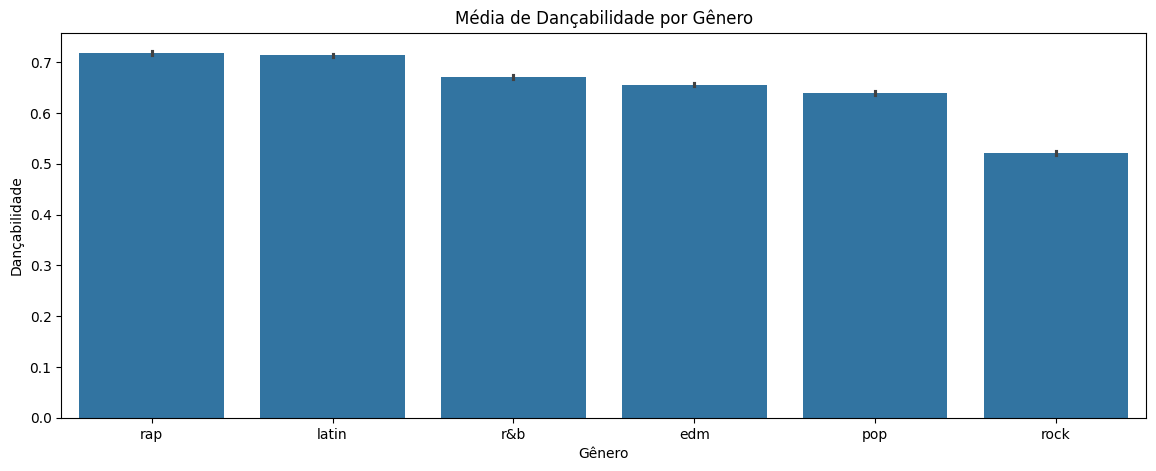

In [16]:
# ANÁLISE DA MÉDIA DE DANÇABILIDADE POR GÊNERO
ordem = df.groupby("genero")["dancabilidade"].mean().sort_values(ascending=False).index

plt.figure(figsize=(14,5))
sns.barplot(
    data=df,
    x="genero",
    y="dancabilidade",
    order=ordem
)
plt.title("Média de Dançabilidade por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Dançabilidade")
plt.show()

📊 Média de Dançabilidade por Gênero

A análise do gráfico nos permite compreender o perfil rítmico de cada gênero. Nesse sentido, a dançabilidade é uma métrica constituída pela união de elementos como estabilidade do ritmo e intensidade da batida.

Nota-se que o gênero com a maior média de dançabilidade é o Rap, seguido pelo Latim, que também apresenta uma média elevada.

Ademais, o Rock contém menor média de dançabilidade. Isso porque a estrutura das músicas desse gênero utilizam ritmos mais complexos e variam consideravelmente sua faixa de BPM (desde faixas lentas e pesadas até faixas muito velozes).

Conforme analisado anteriormente, por mais que o Pop seja o gênero mais popular, ele ocupa a penúltima posição de dançabilidade. Tal fator permite observar que outros aspectos podem ser considerados mais relevantes para caracterizar o sucesso de um gênero do que apenas a característica de dançabilidade.

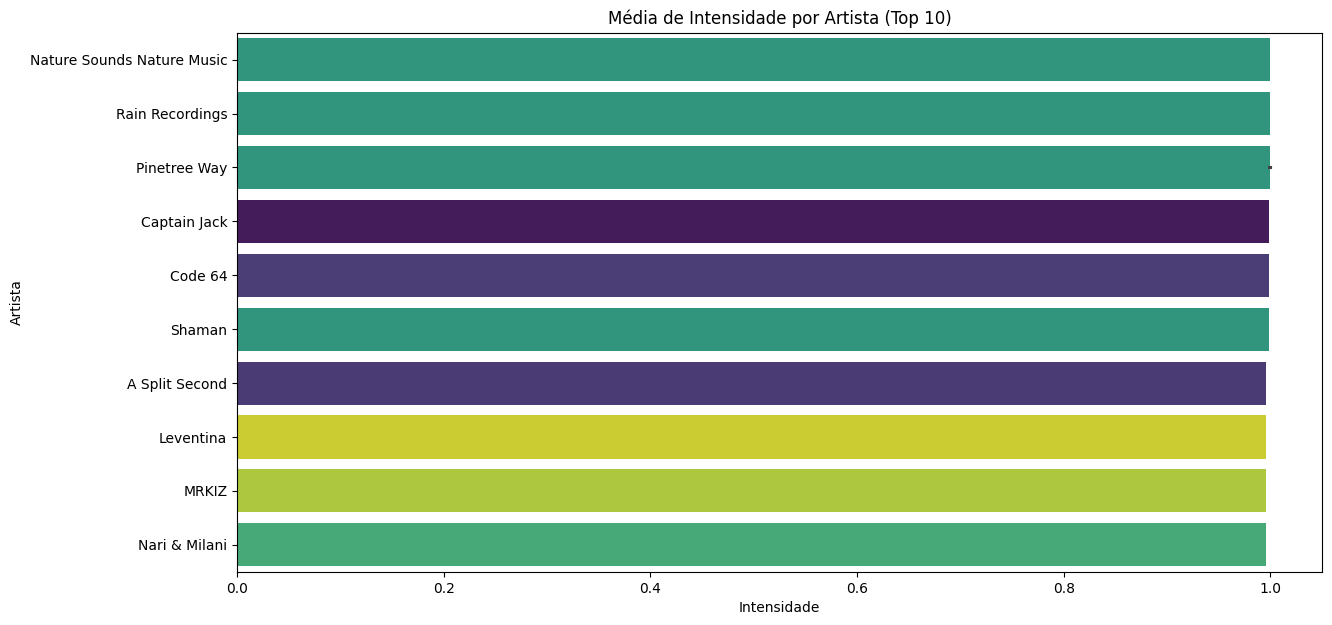

In [17]:
# ANÁLISE DA MÉDIA DE INTENSIDADE POR ARTISTA
ordem = df.groupby("artista")["intensidade"].mean().sort_values(ascending=False).head(10).index

plt.figure(figsize=(14,7))
sns.barplot(
    data=df,
    x="intensidade",
    y="artista",
    order=ordem,
    palette="viridis",
    hue="artista",
    legend=False
)
plt.title("Média de Intensidade por Artista (Top 10)")
plt.xlabel("Intensidade")
plt.ylabel("Artista")
plt.show()

📊 Média de Intensidade por Artista (Top 10)

A intensidade abrange a percepção de ruído, intensidade e volume da faixa, sendo uma medida de caráter técnico e auditivo.

A análise do gráfico nos permite identificar que os 10 artistas com maior valor para a métrica de intensidade, estão situados em posições muito próximas. Tal aspecto indica que o catálogo destes é constituído por faixas muito energéticas.

Nature Sounds e Rain Recordings estão no topo do ranking, isso se deve ao fato de que o algoritmo do Spotify processa ruídos como alta energia sonora. Além disso, Captain Jack e Nari & Milani são artistas cujo gênero das faixas é fortemente voltado para pistas de dança.

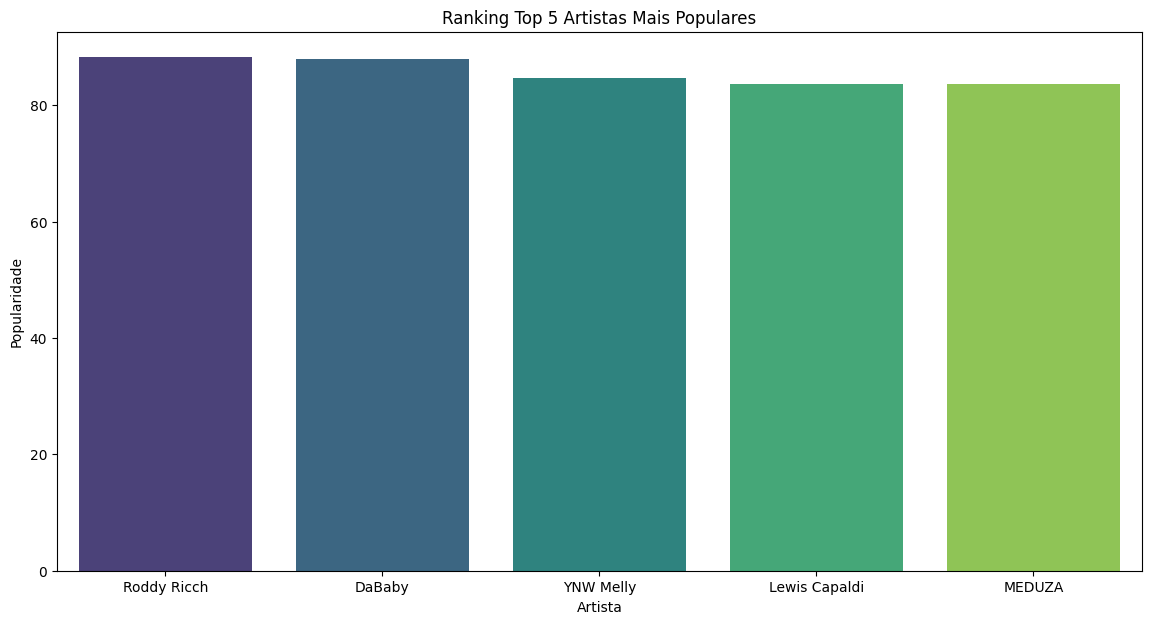

In [18]:
# RANKING 5 ARTISTAS MAIS POPULARES
qtd_musicas_por_artista = df["artista"].value_counts()

artistas_populares = qtd_musicas_por_artista[qtd_musicas_por_artista > 10].index

popularidade_alta = df[df["artista"].isin(artistas_populares)]

ranking_artistas = popularidade_alta.groupby("artista")["popularidade"].mean().sort_values(ascending=False).head(5).reset_index()

plt.figure(figsize=(14,7))
sns.barplot(
    data=ranking_artistas,
    x="artista",
    y="popularidade",
    hue="artista",
    palette="viridis",
    legend=False
)
plt.title("Ranking Top 5 Artistas Mais Populares")
plt.xlabel("Artista")
plt.ylabel("Popularidade")
plt.show()

📊 Ranking Top 5 Artistas Mais Populares

O gráfico apresenta apenas artistas que possuem mais de 10 faixas registradas no catálogo, a fim de garantir relevância estatística.

No topo do ranking estão Roddy Ricch e DaBaby, ambos artistas associados ao gênero Rap. Tal fator confirma o sucesso desse gênero por volta do ano de 2020, como já havia sido verificada em gráficos anteriores.

O artista com maior nível de popularidade na plataforma é o Roddy Ricch, ao passo que MEDUZA apresenta o menor valor para essa categoria. No entanto, nota-se que a diferença entre eles é mínima.

Portanto no topo do ranking, o nível de engajamento é significativamente elevado e estável.

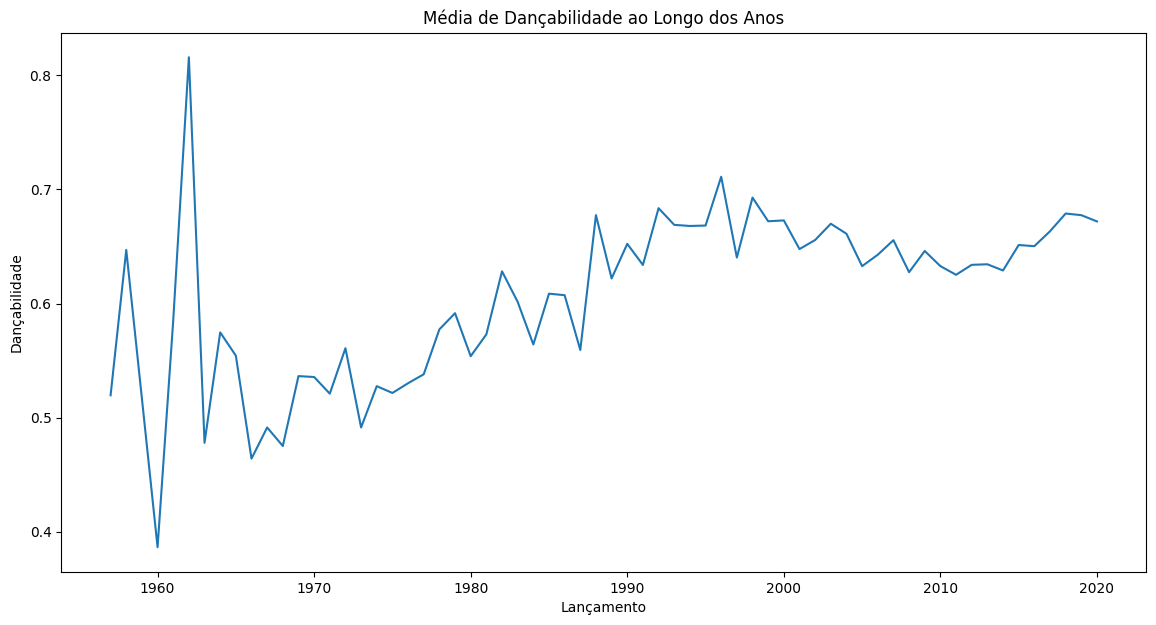

In [19]:
# ANÁLISE DA MÉDIA DE DANÇABILIDADE AO LONGO DOS ANOS
evolucao_dancabilidade = df.groupby("lancamento")["dancabilidade"].mean().reset_index()

plt.figure(figsize=(14,7))
sns.lineplot(
    data=evolucao_dancabilidade,
    x="lancamento",
    y="dancabilidade"
)
plt.xlabel("Lançamento");
plt.ylabel("Dançabilidade")
plt.title("Média de Dançabilidade ao Longo dos Anos")
plt.show()

📊 Média de Dançabilidade ao Longo dos Anos

A análise do gráfico nos permite identificar a evolução do comportamento rítmico das faixas conforme mudanças culturais e tecnológicas ocorridas ao passar dos anos.

Observa-se que na década de 60 houve uma queda abrupta da faixa de dançabilidade. Isso porque há poucos registros de faixas desse período, sobretudo com baixa dançabilidade.

Enquanto que a partir dos anos 80, os valores foram crescendo de forma significativa.

A partir dos anos 2000 os valores assumiram estabilidade em alto nível. Portanto as faixas mais atuais são frequentemente consideradas dançáveis.

In [20]:
# ANÁLISE DA MÉDIA DE DANÇABILIDADE POR GÊNERO
media_dancabilidade = df.groupby("genero")["dancabilidade"].mean().sort_values(ascending=False).reset_index()

fig = px.bar(
    media_dancabilidade,
    x="genero",
    y="dancabilidade",
    title="Média de Dançabilidade por Gênero",
    labels={"genero": "Gênero", "dancabilidade": "Dançabilidade"},
    color="genero"
)
fig.show()

📊 Média de Dançabilidade por Gênero

O gráfico reafirma análises feitas anteriormente, porém, agora com maior precisão técnica.

O Rap é considerado o gênero mais dançável, seguido pelo Latim. A distinção de cores por gênero permite rápida associação visual entre diferentes métricas já analisadas.

Observa-se que a diferença entre as duas primeiras posições é mínima.

Ademais, o Rock permanece na sexta posição. Isso porque sua estrutura musical apresenta complexidade sonora.

In [21]:
# ANÁLISE DA RELAÇÃO ENTRE INTENSIDADE E VOLUME
qtd_faixas = df.sample(1000)

fig = px.scatter(
    qtd_faixas,
    x="intensidade",
    y="volume",
    title="Relação entre Intensidade e Volume",
    hover_name="nome_faixa",
    hover_data=["artista"],
    color="genero",
    labels={"genero": "Gênero"}
)
fig.show()

📊 Relação entre Intensidade e Volume

O gráfico explora a relação entre intensidade e volume das faixas.

Nota-se que à medida que a intensidade aumenta, o volume tende a subir.

Ademais, gêneros EDM e Rap estão mais concentrados no quadrante superior direito, o que indica que essas faixas contém alto impacto sonoro.

Também observa-se que quase não há presença de faixas com baixa intensidade e alto volume ou vice-versa.

In [22]:
# ANÁLISE DA RELAÇÃO ENTRE POPULARIDADE E MODO
popularidade_maior_que_zero = df[df["popularidade"] > 0]

fig = px.histogram(
    popularidade_maior_que_zero,
    x="popularidade",
    facet_col="modo",
    nbins=30,
    title="Distribuição de Popularidade por Modo"
)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig.update_layout(showlegend=False)
fig.show()

📊 Distribuição de Popularidade por Modo

A análise do gráfico permite compreender que em decorrência da semelhança de ambos os gráficos, a escala (maior ou menor) não determina diretamente o nível de popularidade da música.

Ademais, o primeiro gráfico apresenta barras mais altas para o eixo de count, indicando maior presença de faixas pertencentes a escalas maiores.

Em relação a moda, este valor se situa por volta de 60, e conforme analisado anteriormente, esta é a área de "sucesso" das faixas.

Ao alcançar o valor 80, os valores pertencentes a ambas as escalas apresentam queda. Portanto atingir o auge global é igualmente difícil para os 2 modos de escala musical.